# Geographic Visualization - 6.3

# 1 Import Data & Libraries

In [2]:
## Import Data & Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [3]:
## This command propts matplotlib visuals to appear in the notebook

%matplotlib inline

In [11]:
path = r'C:\Users\turne\Chocolate Rating'

In [12]:
path

'C:\\Users\\turne\\Chocolate Rating'

In [13]:
# import data
df = pd.read_csv(os.path.join(path, 'Clean Data','Chocolate_clean.csv'), index_col = False)

In [14]:
country_geo = r'C:\Users\turne\Chocolate Rating\Original Data\world-countries.json'

In [15]:
country_geo

'C:\\Users\\turne\\Chocolate Rating\\Original Data\\world-countries.json'

In [16]:
f = open('C:\\Users\\turne\\Chocolate Rating\\Original Data\\world-countries.json',)
# returns JSON object asa dictionary
data = json.load(f)

In [21]:
# Iterating through the json list
for i in data['features']:
print(i)

IndentationError: expected an indented block after 'for' statement on line 2 (2062399428.py, line 3)

# 2 Data Wrangling

In [22]:
df

,Unnamed: 0,Company Name,Bar Name,REF,Review Date,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...,...
1790,1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru
1791,1791,Zotter,Congo,749,2011,0.65,Austria,3.00,Forastero,Congo
1792,1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,Forastero,India
1793,1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India


In [24]:
df.describe()

,Unnamed: 0,REF,Review Date,Cacao Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000,1795.000000
mean,897.000000,1035.904735,2012.325348,0.717003,3.185933
std,518.316184,552.886365,2.927210,0.063230,0.478062
min,0.000000,5.000000,2006.000000,0.420000,1.000000
25%,448.500000,576.000000,2010.000000,0.700000,2.875000
50%,897.000000,1069.000000,2013.000000,0.700000,3.250000
75%,1345.500000,1502.000000,2015.000000,0.750000,3.500000
max,1794.000000,1952.000000,2017.000000,1.000000,5.000000


In [25]:
df.columns

Index(['Unnamed: 0', 'Company Name', 'Bar Name', 'REF', 'Review Date',
       'Cacao Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

In [26]:
df.dtypes

Unnamed: 0            int64
Company Name         object
Bar Name             object
REF                   int64
Review Date           int64
Cacao Percent       float64
Company Location     object
Rating              float64
Bean Type            object
Bean Origin          object
dtype: object

In [27]:
df.isna().sum()

Unnamed: 0          0
Company Name        0
Bar Name            0
REF                 0
Review Date         0
Cacao Percent       0
Company Location    0
Rating              0
Bean Type           0
Bean Origin         0
dtype: int64

In [28]:
#Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Bar Name', 'REF', 'Review Date'])

In [29]:
#Checked for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1790    False
1791    False
1792    False
1793    False
1794    False
Length: 1795, dtype: bool

In [31]:
df

,Company Name,Cacao Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,0.63,France,3.75,,Sao Tome
1,A. Morin,0.70,France,2.75,,Togo
2,A. Morin,0.70,France,3.00,,Togo
3,A. Morin,0.70,France,3.50,,Togo
4,A. Morin,0.70,France,3.50,,Peru
...,...,...,...,...,...,...
1790,Zotter,0.70,Austria,3.75,,Peru
1791,Zotter,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,0.65,Austria,3.50,Forastero,India
1793,Zotter,0.62,Austria,3.25,,India


# 3 Create Visualization - Histogram

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


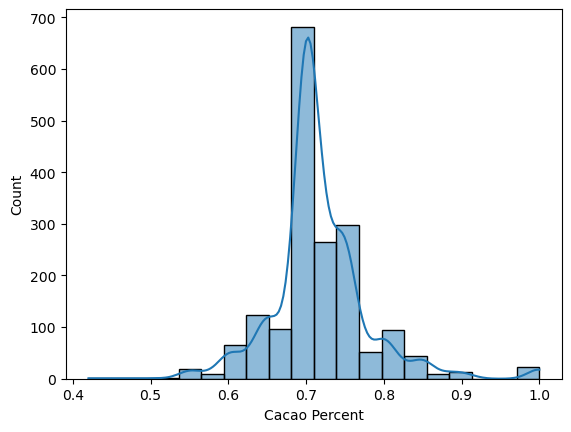

In [34]:
## Create a histogram for extreme values for Cacao Percent
hist_cacao = sns.histplot(df['Cacao Percent'], bins = 20, kde = True)

C:\Users\turne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


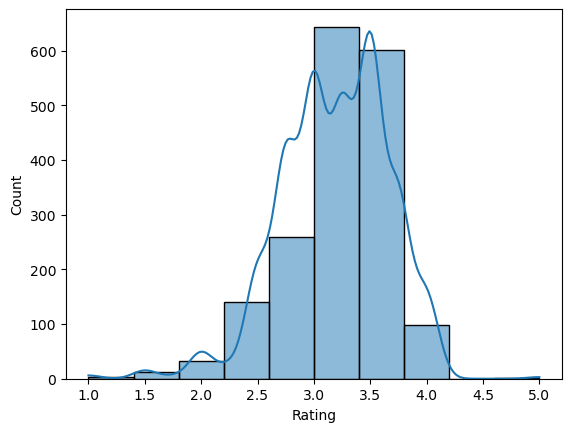

In [35]:
## Create a histogram for extreme values for Rating
hist_rating = sns.histplot(df['Rating'], bins = 10, kde = True)

# 3 Create Visualization cont. - Choropleth Map

In [39]:
# Create a data frame with Company Location and Cacao Percent

cacao_percent_per_country = df[['Company Location','Cacao Percent']]
cacao_percent_per_country.head()

,Company Location,Cacao Percent
0,France,0.63
1,France,0.70
2,France,0.70
3,France,0.70
4,France,0.70


In [40]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = cacao_percent_per_country,
    columns = ['Company Location', 'Cacao Percent'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Cacao Percent").add_to(map)

folium.LayerControl().add_to(map)

In [44]:
# Save the map as an HTML file 
map.save('cacao_percent_per_country_map.html')

In [45]:
# Creating a data frame with the Company Locations (Countries) and the values for Cacao Percent

cacao_percent_per_country = df[['Company Location','Cacao Percent']]
cacao_percent_per_country.head()

,Company Location,Cacao Percent
0,France,0.63
1,France,0.70
2,France,0.70
3,France,0.70
4,France,0.70


In [46]:
# Creating a data frame with the Company Locations (Countries) and the values for Rating

rating_per_country = df[['Company Location','Rating']]
rating_per_country.head()

,Company Location,Rating
0,France,3.75
1,France,2.75
2,France,3.00
3,France,3.50
4,France,3.50


In [49]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = rating_per_country,
    columns = ['Company Location', 'Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rating per Country").add_to(map)

folium.LayerControl().add_to(map)

In [50]:
# Save the map as an HTML file 
map.save('rating_per_country_map.html')

In [52]:
# Creating a data frame with the Bean Origin (Country the Cacao Bean is from) and the values for Rating

rating_per_origin = df[['Bean Origin','Rating']]
rating_per_origin.head()

,Bean Origin,Rating
0,Sao Tome,3.75
1,Togo,2.75
2,Togo,3.00
3,Togo,3.50
4,Peru,3.50


In [53]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = rating_per_origin,
    columns = ['Bean Origin', 'Rating'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rating by Cacao Country").add_to(map)

folium.LayerControl().add_to(map)

In [54]:
# Save the map as an HTML file 
map.save('rating_per_origin_map.html')

In [55]:
# Creating a data frame with the Bean Origin (Country the Cacao Bean is from) and the values for Cacao Percent

percent_per_origin = df[['Bean Origin','Cacao Percent']]
percent_per_origin.head()

,Bean Origin,Cacao Percent
0,Sao Tome,0.63
1,Togo,0.70
2,Togo,0.70
3,Togo,0.70
4,Peru,0.70


In [56]:
map = folium.Map(location = [100, 0], zoom_start = 1.5)

folium.Choropleth(
    geo_data = country_geo, 
    data = percent_per_origin,
    columns = ['Bean Origin', 'Cacao Percent'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Rating by Cacao Country").add_to(map)

folium.LayerControl().add_to(map)

In [57]:
# Save the map as an HTML file 
map.save('percent_per_origin_map.html')

# Results- Does the analysis answer any of your existing research questions? 
First, the Cacao percent appears to be higher in Mexico and northern half of South America (Brazil, Bolivia, Peru, Ecuador, Venezuala, etc.), southern islands of Asia (Philippines, India, Malaysia and Indonesia) and throughout Austrailia. Some of my questions: what are the ratings based on the cocoa beans? What countries provide the highest rated cocoa beans? And do countries closer to the equator produce better cocoa beans? 
Based on what I see on the maps, the ratings show favor to the origin of where the cacao beans are from.  There are 2 factors to consider when looking at the chocolate ratings, Where is the chocolate from? and Where is it made?  The chocolate ratings are based on the origin, therefore those countries provide quality rated chocolate, like Peru, Columbia, Madagascar, and Australia.  Then I look at where the chocolate is made, and several countries that cannot produce the cacao bean have the cacao bean imported for production.  United States/Canada, Russia, France, Italy, Spain, and Ireland provide great ratings for chocolate based on the cacao percent.  
Lastly, do countries closer to the equator produce better cocoa beans? According to the numbers and the map, the answer is yes.  The countries closest to the equator, with 20 degrees north or south of the equator the are countries that provide the best average ratings. The cacao percent has little to do with the countries themselves, but may in fact have more effect on the production process.  